## Figure 5 Code to Produce Figures

This figure will focus on the presentation of Motif Analysis.

In [1]:
# importing packages
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import pickle
import scipy
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from scipy.spatial.distance import squareform, pdist
import scipy.io
from scipy import stats
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from difflib import diff_bytes
import seaborn as sns
import h5py
import scipy
plt.rcParams.update({'font.size': 40})
plt.rcParams["figure.figsize"] = (10,10)

### Power Analysis for Chain Motif Results

In [2]:
# estimate sample size via power analysis: All Assemblies Together
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
nobs1 = 109
effect = 153 / 100
alpha = 0.05
p = 0.95
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power= p, nobs1= None, ratio= 58 / nobs1, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 17.345


In [3]:
# estimate sample size via power analysis
from statsmodels.stats.power import tt_ind_solve_power
# parameters for power analysis
nobs1_array = [13, 6, 5, 6, 6, 9, 4, 41, 23, 11, 7, 12, 12, 6, 11]
mean_diff_by_difference = [26.24, 29.24, 29.24, 29.24, 29.24, 29.24, 29.24, 3.19, 5.24, 26.33, 10.47, 28.82, 28.66, 27.74, 21.24]
alpha = 0.05
# perform power analysis
for i, n in enumerate(nobs1_array):
    effect = mean_diff_by_difference[i] / 30
    r =  58 / n
    result = tt_ind_solve_power(effect_size = effect, nobs1 = None, alpha = alpha, power = 0.95, ratio = r)
    print(f'Sample Size for Assembly {i + 1}: %.3f' % result)

Sample Size for Assembly 1: 21.151
Sample Size for Assembly 2: 15.277
Sample Size for Assembly 3: 15.012
Sample Size for Assembly 4: 15.277
Sample Size for Assembly 5: 15.277
Sample Size for Assembly 6: 16.064
Sample Size for Assembly 7: 14.747
Sample Size for Assembly 8: 1962.506
Sample Size for Assembly 9: 595.391
Sample Size for Assembly 10: 20.381
Sample Size for Assembly 11: 119.771
Sample Size for Assembly 12: 17.330
Sample Size for Assembly 13: 17.520
Sample Size for Assembly 14: 16.953
Sample Size for Assembly 15: 31.150


### First-Order Connection Analysis Assemblies

In [4]:
ground_truth_connectome_v1dd_1 = np.load("ground_truth_connectome_v1dd_1.npy")
ground_truth_connectome_v1dd_1.shape

print("Total connections", np.sum(ground_truth_connectome_v1dd_1))
ground_truth_connectome_v1dd_1

Total connections 171492.0


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  2.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., 16.],
       [ 0.,  0.,  0., ...,  0.,  4.,  0.]])

In [5]:
range(len(ground_truth_connectome_v1dd_1[0]))

range(0, 668)

In [6]:
chain_motifs = pd.read_pickle("chain_motifs_og.pkl")
assemblies_by_coregistered = pd.read_pickle("v1dd_connectome_cell_indexes_by_assembly.pkl")
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,):print(assemblies_by_coregistered)

c = []
for i in assemblies_by_coregistered.values():
    c.append(i)
assembly_root_ids = np.unique(np.concatenate(c))
print(assembly_root_ids)

{0: [64, 149, 89, 10, 12, 87, 122, 62, 109, 69, 52, 108, 110, 159, 66, 135, 92, 45, 24, 42, 153, 41], 1: [148, 130, 125], 2: [76, 75, 4, 78, 58, 112, 59, 17, 90], 3: [14, 73], 4: [11, 65, 99, 39], 5: [14, 65, 34], 6: [148], 7: [70, 64, 149, 1, 75, 89, 78, 88, 150, 71, 167, 87, 47, 48, 62, 109, 69, 52, 55, 123, 152, 53, 117, 68, 22, 56, 144, 66, 125, 92, 156, 126, 72, 137, 32, 24, 153, 138, 141, 102, 95, 104, 94, 27], 8: [4, 78, 13, 167, 47, 120, 80, 63, 52, 55, 112, 157, 51, 59, 159, 113, 35, 144, 156, 160, 126, 90, 37, 29, 26, 104], 9: [84, 80, 79, 55, 22, 56, 144, 72, 33, 93, 141, 98], 10: [82, 128, 63, 112, 101, 39], 11: [64, 149, 150, 71, 147, 62, 129, 74, 110, 124, 57, 159, 117, 68, 144, 66, 92, 160, 126, 28, 161], 12: [64, 149, 75, 12, 150, 71, 124, 57, 158, 117, 20, 161], 13: [21, 149, 75, 109, 69, 53, 110, 57, 159, 158, 117, 155, 160, 28, 41, 161], 14: [3, 149, 12, 150, 71, 167, 62, 111, 124, 57, 20, 66, 23, 153, 101, 161]}
[  1   3   4  10  11  12  13  14  17  20  21  22  23  

In [7]:
assembly_first_order_connections = []
non_assembly_first_order_connections = []
for i in range(len(ground_truth_connectome_v1dd_1[0])):
    if (i+1) in assembly_root_ids:
        assembly_first_order_connections.append(np.sum(ground_truth_connectome_v1dd_1[i,:]))
    else:
        non_assembly_first_order_connections.append(np.sum(ground_truth_connectome_v1dd_1[i,:]))

In [8]:
np.mean(assembly_first_order_connections)

289.4230769230769

In [9]:
np.mean(non_assembly_first_order_connections)

250.6950354609929

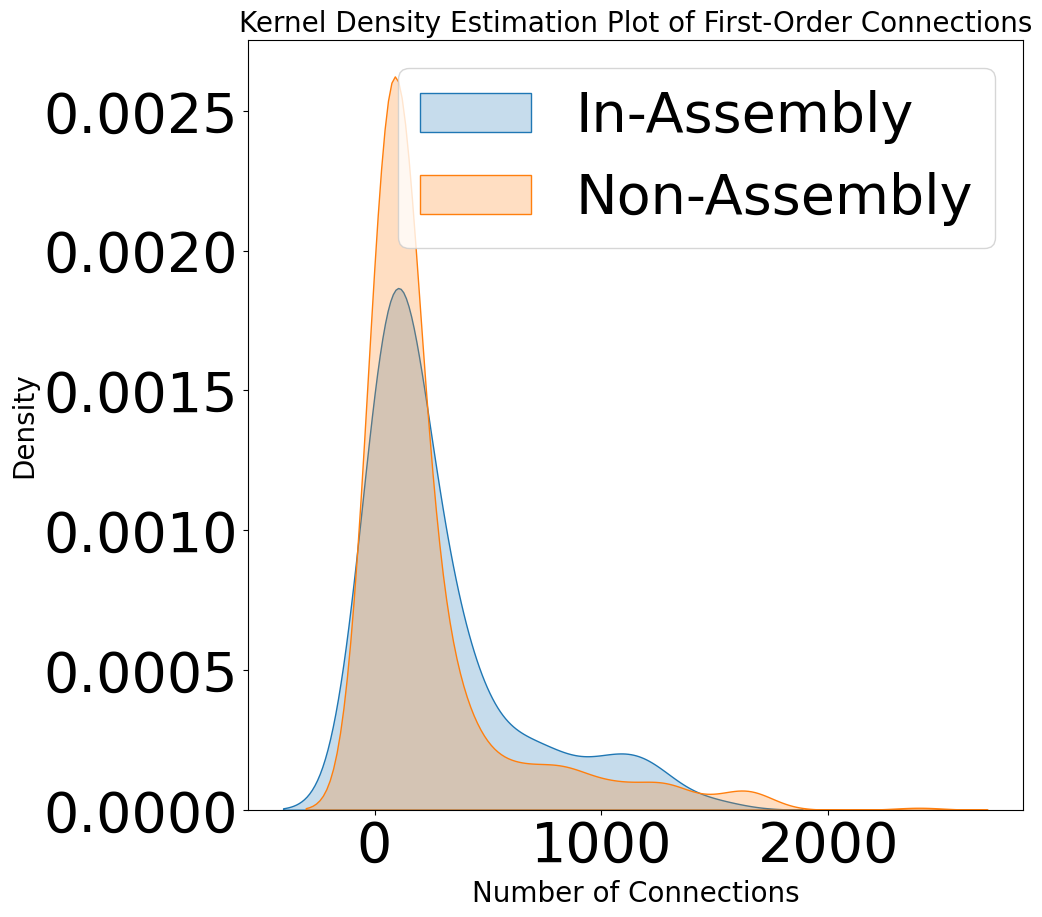

<Figure size 1000x1000 with 0 Axes>

In [10]:
### See the general distribution of the assembly counts to justify the statistical test
## In-assemlby test is bi-modal, so t-test wouldn't be the best to use 
sns.kdeplot(assembly_first_order_connections, fill = True, label = 'In-Assembly')
sns.kdeplot(non_assembly_first_order_connections, fill = True, label = 'Non-Assembly')
plt.legend()
plt.title('Kernel Density Estimation Plot of First-Order Connections', size = 20)
plt.xlabel('Number of Connections', size = 20)
plt.ylabel('Density', size = 20)
plt.show()
plt.savefig("Kernel_Density_Estimator_Connections_Distributions.png", dpi = 1200)

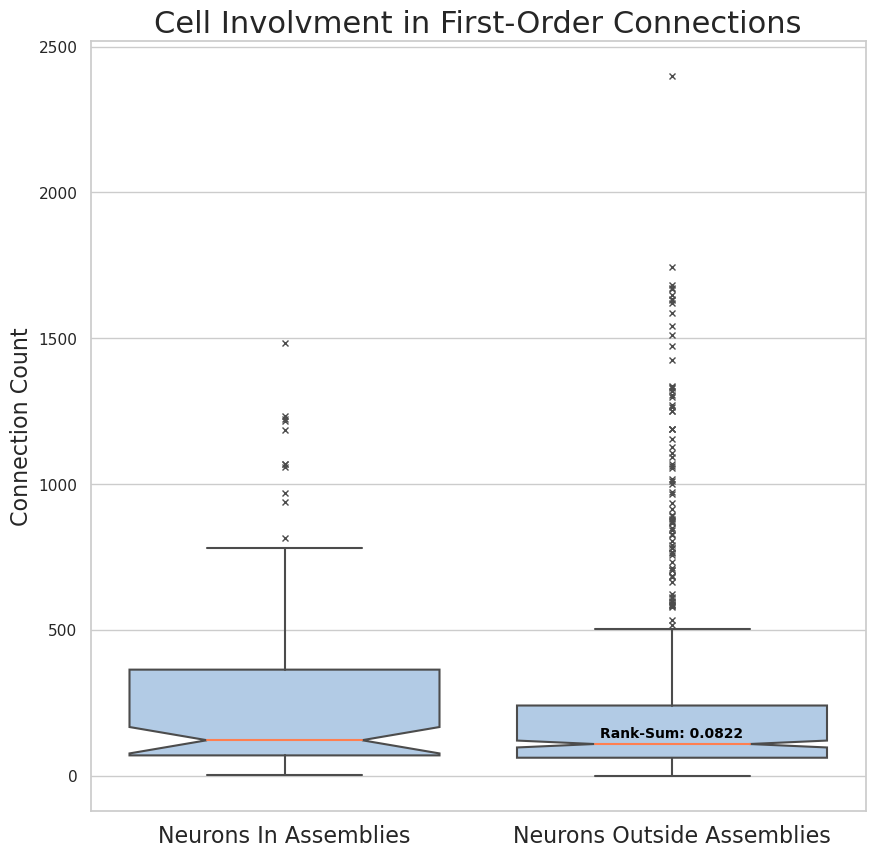

In [11]:
all_arr = [np.array(assembly_first_order_connections).flatten(),
            np.array(non_assembly_first_order_connections).flatten()]
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=all_arr,
                notch=True, showcaps=True,
                flierprops={"marker": "x"},
                boxprops={"facecolor": (.4, .6, .8, .5)},
                medianprops={"color": "coral"},
            )
ax.set_xticklabels(["Neurons In Assemblies", "Neurons Outside Assemblies"], size = 16)
ax.set_title('Cell Involvment in First-Order Connections', size = 22)
ax.set_ylabel('Connection Count', size = 16)

medians = np.array(
    [np.median(np.array(assembly_first_order_connections).flatten()),
     np.median(np.array(non_assembly_first_order_connections).flatten())]
)

vertical_offset = medians * 0.2 # offset from median for display
p_values = [np.nan,
            'Rank-Sum: {:.3g}'.format(stats.ranksums(np.array(assembly_first_order_connections).flatten(), np.array(non_assembly_first_order_connections).flatten()).pvalue, 5)]

for xtick in ax.get_xticks():
    if xtick != 0:
        ax.text(xtick, medians[xtick] + vertical_offset[xtick], p_values[xtick], 
                horizontalalignment='center', size='small', color='black', weight='semibold')

plt.savefig('first_order_boxplot.png', dpi = 1200)
plt.show()

In [12]:
np.unique(chain_motifs.neu_cat1.values)

array([  2,   4,   5,   6,   8,   9,  10,  12,  13,  17,  19,  20,  21,
        25,  26,  28,  29,  30,  31,  32,  34,  35,  37,  38,  39,  41,
        42,  50,  51,  52,  53,  56,  60,  61,  63,  67,  68,  75,  76,
        77,  80,  81,  83,  84,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  97,  98, 100, 101, 102, 103, 105, 106, 109, 110, 111,
       112, 122, 123, 131, 132, 133, 134, 141, 142, 143, 144, 145, 146,
       149, 150, 151, 157, 158, 159, 160, 161, 169, 170, 171, 172, 173,
       177, 178, 179, 180, 181, 182, 183, 185, 186, 189, 191, 192, 193,
       194, 195, 196, 203, 204, 207, 208, 209, 210, 211, 212, 213, 216,
       217, 220, 221, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233,
       234, 235, 238, 239, 245, 246, 248, 249, 252, 253, 255, 256, 257,
       258, 259, 266, 267, 268, 269, 270, 275, 277, 278, 279, 280, 281,
       282, 283, 284, 285, 288, 289, 291, 292, 293, 294, 295, 296, 298,
       299, 310, 311, 314, 315, 316, 319, 320, 321, 325, 326, 32

In [13]:
np.unique(chain_motifs.neu_cat2.values)

array([  2,   4,   5,   6,   8,  10,  13,  17,  20,  21,  25,  26,  27,
        28,  29,  30,  31,  32,  34,  35,  37,  38,  39,  41,  42,  50,
        51,  52,  53,  56,  59,  60,  61,  62,  63,  66,  67,  68,  75,
        76,  77,  80,  81,  83,  84,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  97,  98, 100, 101, 102, 103, 105, 106, 107, 109,
       110, 111, 112, 122, 123, 131, 132, 133, 134, 141, 142, 143, 144,
       145, 146, 148, 149, 150, 151, 157, 158, 159, 160, 161, 170, 171,
       172, 173, 176, 177, 178, 179, 180, 181, 182, 183, 185, 186, 188,
       189, 191, 192, 193, 194, 195, 196, 203, 204, 206, 207, 208, 209,
       210, 211, 212, 213, 216, 217, 220, 221, 223, 224, 225, 226, 227,
       228, 229, 230, 232, 233, 234, 235, 238, 239, 245, 246, 248, 249,
       252, 253, 255, 256, 257, 258, 259, 265, 266, 267, 268, 269, 270,
       274, 275, 277, 278, 279, 280, 281, 282, 283, 284, 285, 288, 289,
       291, 292, 293, 294, 295, 296, 298, 299, 310, 311, 313, 31

### Chain Motif Analysis Assemblies

In [14]:
chain_motifs = pd.read_pickle("chain_motifs_og.pkl")
assemblies_by_coregistered = pd.read_pickle("v1dd_connectome_cell_indexes_by_assembly.pkl")
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,):print(assemblies_by_coregistered)

{0: [64, 149, 89, 10, 12, 87, 122, 62, 109, 69, 52, 108, 110, 159, 66, 135, 92, 45, 24, 42, 153, 41], 1: [148, 130, 125], 2: [76, 75, 4, 78, 58, 112, 59, 17, 90], 3: [14, 73], 4: [11, 65, 99, 39], 5: [14, 65, 34], 6: [148], 7: [70, 64, 149, 1, 75, 89, 78, 88, 150, 71, 167, 87, 47, 48, 62, 109, 69, 52, 55, 123, 152, 53, 117, 68, 22, 56, 144, 66, 125, 92, 156, 126, 72, 137, 32, 24, 153, 138, 141, 102, 95, 104, 94, 27], 8: [4, 78, 13, 167, 47, 120, 80, 63, 52, 55, 112, 157, 51, 59, 159, 113, 35, 144, 156, 160, 126, 90, 37, 29, 26, 104], 9: [84, 80, 79, 55, 22, 56, 144, 72, 33, 93, 141, 98], 10: [82, 128, 63, 112, 101, 39], 11: [64, 149, 150, 71, 147, 62, 129, 74, 110, 124, 57, 159, 117, 68, 144, 66, 92, 160, 126, 28, 161], 12: [64, 149, 75, 12, 150, 71, 124, 57, 158, 117, 20, 161], 13: [21, 149, 75, 109, 69, 53, 110, 57, 159, 158, 117, 155, 160, 28, 41, 161], 14: [3, 149, 12, 150, 71, 167, 62, 111, 124, 57, 20, 66, 23, 153, 101, 161]}


In [15]:
# initialize data frames for keeping track of chain motifs
assembly_cat0=pd.DataFrame()
assembly_cat1=pd.DataFrame()
assembly_cat2=pd.DataFrame()

assm = []
for i in assemblies_by_coregistered:
    for jj in assemblies_by_coregistered[i]:
            
                mask = chain_motifs.neu_cat0.apply(lambda x: jj == x)
                cat0 = chain_motifs[mask]
                assembly_cat0 = pd.concat([assembly_cat0,cat0])
                
                mask1 = chain_motifs.neu_cat1.apply(lambda x: jj == x)
                cat1 = chain_motifs[mask1]
                assembly_cat1 = pd.concat([assembly_cat1,cat1])
                
                
                mask2 = chain_motifs.neu_cat2.apply(lambda x: jj == x)
                cat2 = chain_motifs[mask2]
                assembly_cat2 = pd.concat([assembly_cat2,cat2])

# keep track of assembly cell ids
assembly_cat0['assembly_cell_id'] = assembly_cat0['neu_cat0']
assembly_cat1['assembly_cell_id'] = assembly_cat1['neu_cat1']
assembly_cat2['assembly_cell_id'] = assembly_cat2['neu_cat2']

In [16]:
# combine all information to one data frame
assembly_cells = pd.DataFrame()
assembly_cells = pd.concat([assembly_cat0,assembly_cat1,assembly_cat2])
assembly_cells['cell_types'] = [tuple(x) for x in assembly_cells['cell_types']]
assembly_cells

,motif_type,motif_cells,neu_cat0,neu_cat1,neu_cat2,cell_types,assembly_cell_id
88582,chain,"[149, 26, 487]",149,26,487,"(PYC-23, BC-23, PYC-23)",149
88583,chain,"[149, 469, 487]",149,469,487,"(PYC-23, BC-23, PYC-23)",149
88588,chain,"[149, 442, 487]",149,442,487,"(PYC-23, BPC-23, PYC-23)",149
88592,chain,"[149, 2, 487]",149,2,487,"(PYC-23, MC-23, PYC-23)",149
88618,chain,"[149, 39, 487]",149,39,487,"(PYC-23, PYC-23, PYC-23)",149
...,...,...,...,...,...,...,...
273175,chain,"[611, 493, 161]",611,493,161,"(BPC-23, PYC-23, PYC-23)",161
273247,chain,"[611, 509, 161]",611,509,161,"(BPC-23, PYC-23, PYC-23)",161
273319,chain,"[611, 535, 161]",611,535,161,"(BPC-23, PYC-23, PYC-23)",161
273391,chain,"[611, 539, 161]",611,539,161,"(BPC-23, PYC-23, PYC-23)",161


In [17]:
### define the assembly counts
assembly_counts = assembly_cells['assembly_cell_id'].value_counts()
assembly_counts

101    9432
53     7786
123    7701
144    6896
159    6328
20     5970
112    5817
51     5534
35     5372
160    5295
26     5080
39     4958
161    4480
42     4441
89     4030
28     3272
158    2804
10     2720
150    2628
17     2163
21     2130
94     2118
75     2108
32     1922
110    1908
87     1844
84     1683
52     1638
95     1551
76     1543
13     1504
80     1496
111    1374
149    1302
122    1242
63     1166
98     1086
41      988
109     978
68      780
90      768
29      702
92      669
102     441
93      437
88      361
34      318
148     314
37      298
66      256
4       182
141     176
56      160
12      150
62      144
59       34
27       33
157      27
Name: assembly_cell_id, dtype: int64

In [18]:
### derive the same information from the non-assembly set
non_assembly_motifs = pd.read_pickle("non_assembly_cells_chain_og.pkl")
non_assembly_motifs

,motif_type,motif_cells,neu_cat0,neu_cat1,neu_cat2,cell_types,assembly_cell_id,assembly_id
3816,chain,"[5, 20, 30]",5,20,30,"[PYC-23, BC-23, BC-23]",5,()
3817,chain,"[5, 20, 291]",5,20,291,"[PYC-23, BC-23, BC-23]",5,()
3818,chain,"[5, 25, 30]",5,25,30,"[PYC-23, BC-23, BC-23]",5,()
3819,chain,"[5, 25, 291]",5,25,291,"[PYC-23, BC-23, BC-23]",5,()
3821,chain,"[5, 30, 291]",5,30,291,"[PYC-23, BC-23, BC-23]",5,()
...,...,...,...,...,...,...,...,...
258299,chain,"[588, 314, 170]",588,314,170,"[MC-23, PYC-23, PYC-23]",170,()
258313,chain,"[588, 420, 170]",588,420,170,"[MC-23, PYC-23, PYC-23]",170,()
258327,chain,"[588, 513, 170]",588,513,170,"[MC-23, PYC-23, PYC-23]",170,()
258341,chain,"[588, 577, 170]",588,577,170,"[MC-23, PYC-23, PYC-23]",170,()


In [19]:
non_assembly_counts = non_assembly_motifs['assembly_cell_id'].value_counts()
non_assembly_counts

31     13578
351     7857
51      5534
2       4565
21      4260
53      3893
89      2015
5       1957
268     1590
76      1543
158     1402
217     1234
98      1086
170      930
224      786
269      730
150      657
230      641
192      624
437      550
646      543
173      481
102      441
68       390
61       333
109      326
325      303
177      208
25       192
86       148
4         91
19        62
176       50
9         27
Name: assembly_cell_id, dtype: int64

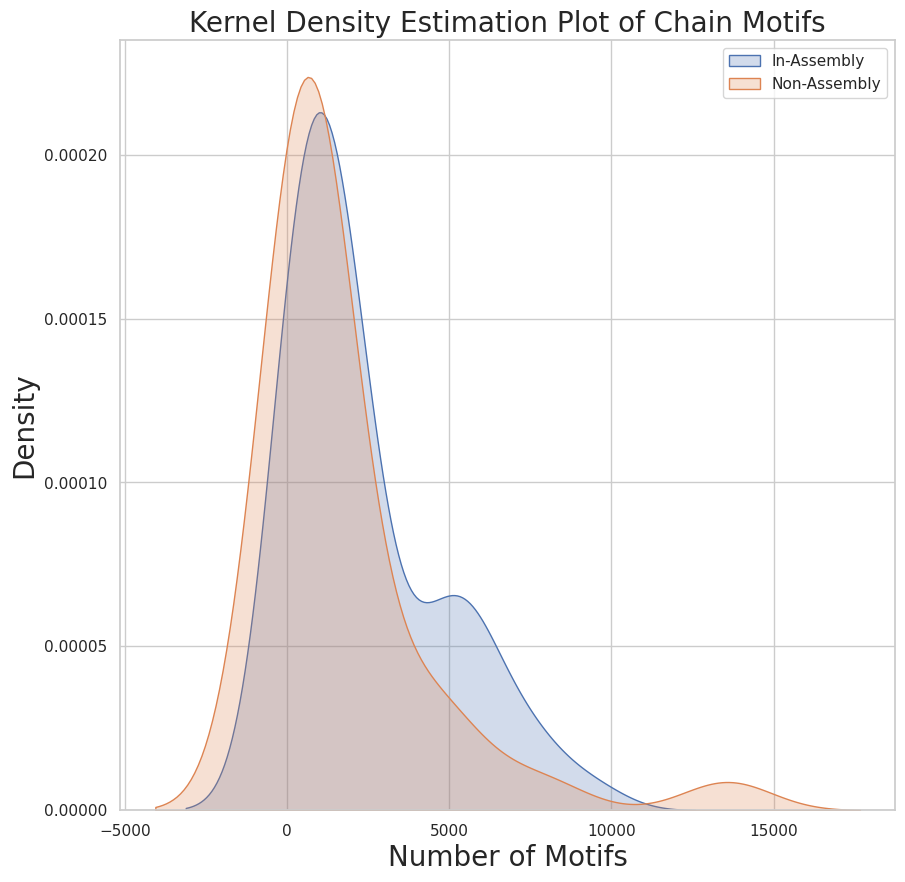

<Figure size 1000x1000 with 0 Axes>

In [20]:
### See the general distribution of the assembly counts to justify the statistical test
## In-assemlby test is bi-modal, so t-test wouldn't be the best to use 
sns.kdeplot(assembly_counts, fill = True, label = 'In-Assembly')
sns.kdeplot(non_assembly_counts, fill = True, label = 'Non-Assembly')
plt.legend()
plt.title('Kernel Density Estimation Plot of Chain Motifs', size = 20)
plt.xlabel('Number of Motifs', size = 20)
plt.ylabel('Density', size = 20)
plt.show()
plt.savefig("Kernel_Density_Estimator_Motif_Distributions.png", dpi = 1200)

In [21]:
### FOUND THIS CODE AT THIS LINK SAI: MAYBE TRY TO PLAY WITH IT https://stackoverflow.com/questions/70613625/how-can-i-generate-a-cdf-using-kernel-density-estimation-in-python
# kde_a = stats.gaussian_kde(assembly_counts)
# kde_na = stats.gaussian_kde(non_assembly_counts)

# class KDEDist(stats.rv_continuous):
    
#     def __init__(self, kde, *args, **kwargs):
#         super().__init__(*args, **kwargs)
#         self._kde = kde
    
#     def _pdf(self, x):
#         return self._kde.pdf(x)

# A_X = KDEDist(kde_a)
# NA_X = KDEDist(kde_na)

# fig, axe = plt.subplots()
# #axe.hist(data, density=1)
# axe.plot(x, A_X.cdf(x))
# #axe.plot(x, NA_X.cdf(x))

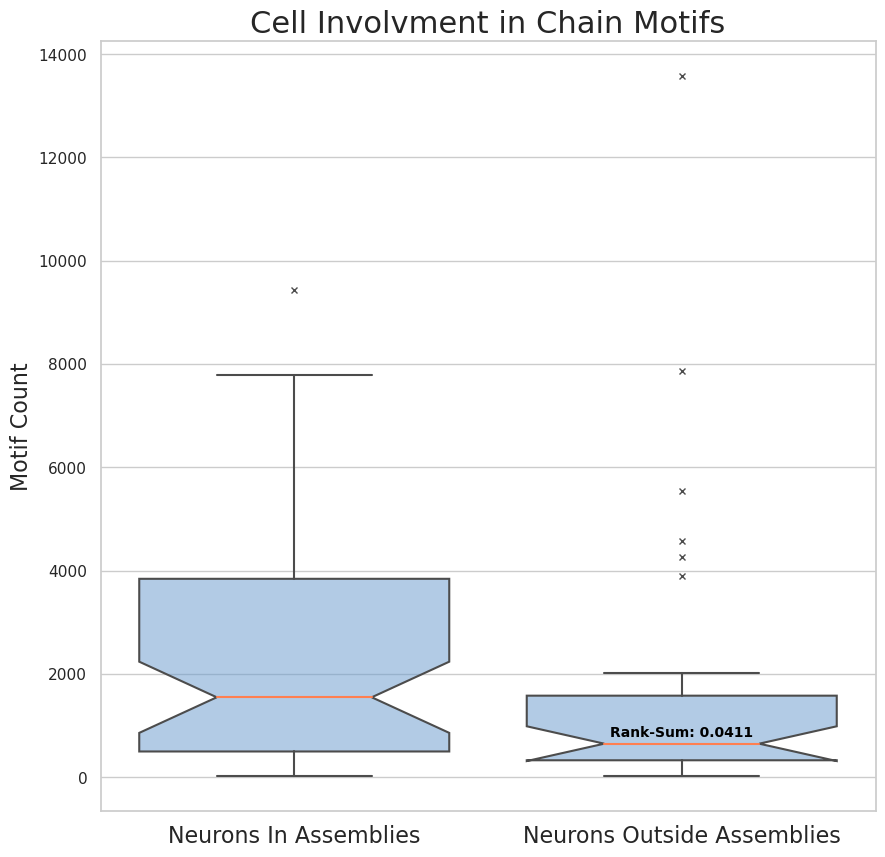

In [22]:
all_arr = [np.array(assembly_counts).flatten(),
            np.array(non_assembly_counts).flatten()]
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=all_arr,
                notch=True, showcaps=True,
                flierprops={"marker": "x"},
                boxprops={"facecolor": (.4, .6, .8, .5)},
                medianprops={"color": "coral"},
            )
ax.set_xticklabels(["Neurons In Assemblies", "Neurons Outside Assemblies"], size = 16)
ax.set_title('Cell Involvment in Chain Motifs', size = 22)
ax.set_ylabel('Motif Count', size = 16)

medians = np.array(
    [np.median(np.array(assembly_counts).flatten()),
     np.median(np.array(non_assembly_counts).flatten())]
)

vertical_offset = medians * 0.2 # offset from median for display
p_values = [np.nan,
            'Rank-Sum: {:.3g}'.format(stats.ranksums(np.array(assembly_counts).flatten(), np.array(non_assembly_counts).flatten()).pvalue, 5)]

for xtick in ax.get_xticks():
    if xtick != 0:
        ax.text(xtick, medians[xtick] + vertical_offset[xtick], p_values[xtick], 
                horizontalalignment='center', size='small', color='black', weight='semibold')

plt.savefig('chain_motif_boxplot.png', dpi = 1200)
plt.show()